In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
books = pd.read_csv("dataset/BX-Books.csv", sep = ";", on_bad_lines = 'skip', encoding = 'latin1')
books.head()

C:\Users\user\AppData\Local\Temp\ipykernel_21700\683712280.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv("dataset/BX-Books.csv", sep = ";", on_bad_lines = 'skip', encoding = 'latin1')


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [52]:
books.shape

(271360, 8)

In [53]:
books.columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype='object')

In [54]:
books = books[['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S']]


In [55]:
books.rename(columns = {
    'Book-Title' : 'title',
    'Book-Author' : 'author',
    'Year-Of-Publication' : 'year',
    'Publisher' : 'publisher',
    'Image-URL-S' : 'img_url'
}, inplace = True)

C:\Users\user\AppData\Local\Temp\ipykernel_21700\2488285675.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books.rename(columns = {


In [56]:
books.head()

,ISBN,title,author,year,publisher,img_url
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...


In [57]:
users = pd.read_csv("dataset/BX-Users.csv", sep = ";", on_bad_lines = 'skip', encoding = 'latin1', engine = 'python')
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [58]:
users.shape

(278177, 3)

In [59]:
ratings = pd.read_csv("dataset/BX-Book-Ratings.csv", sep = ";", on_bad_lines = 'skip', encoding = 'latin1')
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [60]:
ratings.shape

(1149780, 3)

In [61]:
ratings.rename(columns = {
    'User-ID' : 'user_id',
    'Book-Rating' : 'rating'
}, inplace = True)

In [62]:
ratings.head()

,user_id,ISBN,rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [63]:
ratings['user_id'].value_counts()

11676     13602
198711     7550
153662     6109
98391      5891
35859      5850
          ...  
116180        1
116166        1
116154        1
116137        1
276723        1
Name: user_id, Length: 105283, dtype: int64

In [64]:
ratings['user_id'].unique().shape

(105283,)

In [65]:
a = ratings['user_id'].value_counts() > 180

In [66]:
a[a].shape

(1010,)

In [67]:
b = a[a].index
b

Int64Index([ 11676, 198711, 153662,  98391,  35859, 212898, 278418,  76352,
            110973, 235105,
            ...
            137397, 154346,  59189, 179730,  67547, 161037,  48046,  56554,
             27788, 114216],
           dtype='int64', length=1010)

In [68]:
ratings = ratings[ratings['user_id'].isin(b)]

In [69]:
ratings.head()

,user_id,ISBN,rating
1456,277427,002542730X,10
1457,277427,0026217457,0
1458,277427,003008685X,8
1459,277427,0030615321,0
1460,277427,0060002050,0


In [70]:
ratings.shape

(547483, 3)

In [71]:
ratings_vs_books = ratings.merge(books, on = 'ISBN')

In [72]:
ratings_vs_books.head()

,user_id,ISBN,rating,title,author,year,publisher,img_url
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...


In [73]:
ratings_vs_books.shape

(507068, 8)

In [74]:
num_ratings = ratings_vs_books.groupby('title')['rating'].count().reset_index()

In [75]:
num_ratings.rename(columns = {
    'rating' : 'num_ratings'
}, inplace = True)

num_ratings.head()

,title,num_ratings
0,A Light in the Storm: The Civil War Diary of ...,3
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,Beyond IBM: Leadership Marketing and Finance ...,1
4,Clifford Visita El Hospital (Clifford El Gran...,1


In [76]:
final_ratings = ratings_vs_books.merge(num_ratings, on = 'title')
final_ratings.head()

,user_id,ISBN,rating,title,author,year,publisher,img_url,num_ratings
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82


In [77]:
final_ratings.shape

(507068, 9)

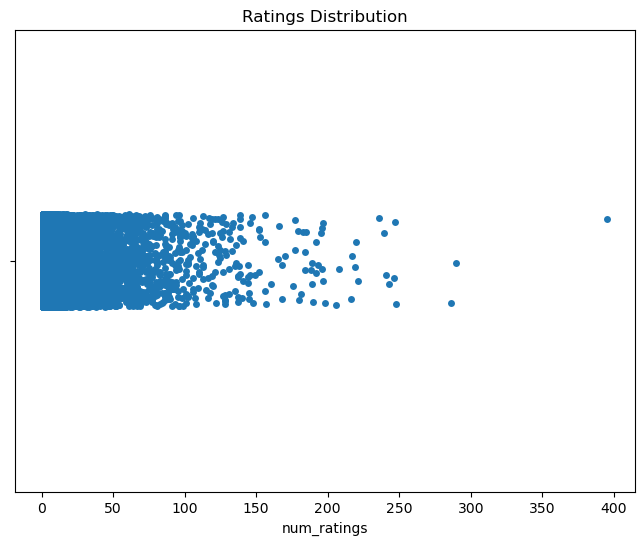

In [78]:
plt.figure(figsize = (8, 6))
sns.stripplot(x = 'num_ratings', data = num_ratings)
plt.title('Ratings Distribution')
plt.show()

In [79]:
final_ratings = final_ratings[final_ratings['num_ratings'] >= 45]

In [80]:
final_ratings.shape

(75142, 9)

In [81]:
final_ratings.sample(10)

,user_id,ISBN,rating,title,author,year,publisher,img_url,num_ratings
4694,232131,0965739228,0,Oryx and Crake,Margaret Atwood,2003,Doubleday,http://images.amazon.com/images/P/0965739228.0...,65
15819,177374,0373244487,0,Cordina's Crown Jewel,Nora Roberts,2002,Silhouette,http://images.amazon.com/images/P/0373244487.0...,51
36826,35857,042513699X,0,Turtle Moon,Alice Hoffman,1993,Berkley Publishing Group,http://images.amazon.com/images/P/042513699X.0...,86
84921,142093,089480829X,0,What to Expect When You're Expecting (Revised ...,Arlene Eisenberg,1996,Workman Pub Co,http://images.amazon.com/images/P/089480829X.0...,60
71264,231210,0553279912,0,A Is for Alibi (Kinsey Millhone Mysteries (Pap...,SUE GRAFTON,1987,Bantam,http://images.amazon.com/images/P/0553279912.0...,146
60271,51883,0451171810,0,The Dark Half,Stephen King,1994,Signet,http://images.amazon.com/images/P/0451171810.0...,97
178714,150968,0425168468,0,Practical Magic,Alice Hoffman,1998,Berkley Publishing Group,http://images.amazon.com/images/P/0425168468.0...,81
197785,240144,0671028375,0,Fatal Voyage,Kathy Reichs,2002,Pocket,http://images.amazon.com/images/P/0671028375.0...,51
56089,23768,014130538X,0,Call of the Wild,Jack London,1999,Puffin Books,http://images.amazon.com/images/P/014130538X.0...,91
39743,31315,0385324057,10,Summer Sisters,Judy Blume,1998,Delacorte Press,http://images.amazon.com/images/P/0385324057.0...,193


In [82]:
final_ratings.drop_duplicates(['user_id', 'title'], inplace = True)
final_ratings.shape

(72878, 9)

In [83]:
pvt = final_ratings.pivot_table(index = 'title', columns = 'user_id', values = 'rating')

In [84]:
pvt

user_id,254,2033,2276,2766,2977,3363,3757,4017,4385,6242,...,274301,274308,274808,275970,276680,277427,277478,277639,278188,278418
title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1st to Die: A Novel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010: Odyssey Two,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
204 Rosewood Lane,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
2nd Chance,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,7.0,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
You Belong To Me,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [85]:
pvt.shape

(958, 998)

In [86]:
pvt.fillna(0, inplace = True)

In [87]:
from scipy.sparse import csr_matrix
sparse = csr_matrix(pvt)

In [88]:
from sklearn.neighbors import NearestNeighbors
model = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model.fit(sparse)

NearestNeighbors(algorithm='brute', metric='cosine')

In [89]:
distance, index = model.kneighbors(pvt.iloc[0, :].values.reshape(1, -1), n_neighbors = 6)

In [90]:
distance

array([[0.        , 0.74794356, 0.76811963, 0.78304026, 0.79460102,
        0.79612507]])

In [91]:
index

array([[  0,  65, 740, 452, 673, 395]], dtype=int64)

In [92]:
index[0, 1]

65

In [93]:
for i in range(0, index.shape[1]):
  if i!=0:
  #print(i)
    print(pvt.index[index[0, i]])

Animal Farm
The Handmaid's Tale
Naked
The Catcher in the Rye
Lord of the Flies


In [94]:
book_names = pvt.index

In [95]:
import pickle
pickle.dump(model, open('artifacts/model.pkl', 'wb'))
pickle.dump(book_names, open('artifacts/book_names.pkl', 'wb'))
pickle.dump(final_ratings, open('artifacts/final_ratings.pkl', 'wb'))
pickle.dump(pvt, open('artifacts/pivot.pkl', 'wb'))

In [96]:
def recommender(book_name):
    book_id = np.where(pvt.index == book_name)[0][0]
    distance, index = model.kneighbors(pvt.iloc[book_id, :].values.reshape(1, -1), n_neighbors = 6)
    for i in range(0, index.shape[1]):
        if i!=0:
            print(pvt.index[index[0, i]])

In [97]:
recommender('Animal Farm')

1984
Angus, Thongs and Full-Frontal Snogging: Confessions of Georgia Nicolson
Second Nature
Midnight
Cause Celeb
